# Загрузка обученной модели, расчет предсказаний

In [21]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn import metrics
from xgboost import XGBClassifier
import pickle

pd.options.display.max_columns = None


## Загрузка модели и данных для предсказаний

In [22]:
# Путь к директории с данными и моделью
preprocessed_dir = '../../03_preprocessed_data/'

In [23]:
model_name = ('submit-rf05-29-2021-23-38.pkl')
loaded_model = pickle.load(open(model_name, 'rb'))

In [24]:
all_data = pd.read_csv(preprocessed_dir + 'X.csv')

C:\Users\omore\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (46,65,121,140,196,271,421,590,646,665) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Изпользуемые фичи

In [59]:
use_for_train = ['10_max_stage_max', '11_stage_inc_monthly', '2_std_air', '9_mean_air', '11_std_stage_max', 
                 'distance_from_source', '7_std_stage_max', 'n_jams_prelast_year', '8_std_stage_max',
                 '1_max_stage_max', '1_mean_stage_max', '8_max_air', '8_mean_stage_max', '10_mean_air',
                 '12_std_air', 'is_prelast_year_missing', '1_mean_air', '12_min_stage_max', 'year', 
                 '8_stage_inc_monthly', '7_min_air', '9_std_stage_max', '11_max_air', '6_stage_inc_monthly', 
                 '2_max_stage_max', '6_std_stage_max', '2_min_air', '9_max_stage_max', '6_min_air', 
                 '10_std_air', '8_max_stage_max', 'n_jams_past', '12_max_stage_max', '10_min_air', 
                 '12_min_air', 'is_last_year_missing', '7_max_air', 'station_id', '7_std_air', '6_mean_air', 
                 '2_min_stage_max', '12_mean_stage_max', '6_max_air', '11_min_stage_max', '9_min_air', 
                 '2_mean_stage_max', '7_min_stage_max', '1_min_air', 'day', '6_std_air', 
                 'ice_jam_same_day_last_year', '2_std_stage_max', '1_std_air', '7_stage_inc_monthly', 
                 '11_mean_stage_max', '11_max_stage_max', '9_max_air', 'ice_jam_same_day_prelast_year', 
                 '10_max_air', '11_mean_air', '7_mean_stage_max', '11_min_air', '8_min_stage_max',
                 '9_stage_inc_monthly', '1_min_stage_max', '6_mean_stage_max', '6_max_stage_max', 
                 '1_max_air', '10_mean_stage_max', '9_mean_stage_max', 'drainage_area', '8_std_air', 
                 'n_jams_last_year', '12_mean_air', '12_std_stage_max', '2_mean_air', 
                 'n_ice_jams_same_days_before', '2_max_air', '10_std_stage_max', '9_min_stage_max', 
                 'height_diff_by_dist', '10_min_stage_max', '12_stage_inc_monthly', '7_mean_air', 
                 '1_stage_inc_monthly', '6_min_stage_max', 'n_ice_jams_same_days_before_ratio', 
                 '2_stage_inc_monthly', '8_min_air', '7_max_stage_max', '9_std_air', 
                 '10_stage_inc_monthly', '11_std_air', 'z_null', '1_std_stage_max', '12_max_air', '8_mean_air'
                ]

In [60]:
X_used = all_data[use_for_train + ['is_test', 'ice_jam']  ]
X_val = X_used[(X_used['is_test'] == True)].drop(['ice_jam'], axis = 1).reset_index(drop=True).dropna()

## Расчет предсказаний для загруженных данных

In [61]:
result = loaded_model.predict(X_val)

In [ ]:
result.to_csv()

Text(0.5, 0, 'XGBoost Importance')

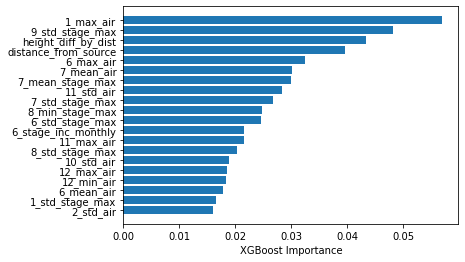

In [62]:
importances = loaded_model.feature_importances_
feature_names = X_val.columns
sorted_idx = importances.argsort()[-20:]


plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel("XGBoost Importance")
